link do dataset: https://www.kaggle.com/datasets/mexwell/data-science-salary-data

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, norm
from scipy.stats import mannwhitneyu
from scipy.stats import spearmanr
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding='latin1', low_memory=False)

Saving salaries.csv to salaries.csv


In [ ]:
df = pd.read_csv("salaries.csv", encoding='latin1', low_memory=False)

# 3a atividade

In [ ]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,AI Architect,800000,USD,800000,CA,100,CA,M
1,2023,EN,FT,Data DevOps Engineer,44382,EUR,47918,NL,50,NL,L
2,2024,EN,FT,Data Analyst,40100,EUR,44555,LT,0,LT,M


In [ ]:
df.shape

(13730, 11)

In [ ]:
# Retirando os outliars
df_filtrado_maior = df[df['salary_in_usd'] > 0]
df_filtrado = df_filtrado_maior[df_filtrado_maior['salary_in_usd'] < 300000]
df_sample = df_filtrado.sample(frac=0.33)


In [ ]:
df_filtrado.shape

(13367, 11)

In [ ]:
# Selecionando duas amostras
amostra_a = df_sample[df_sample['experience_level'] == 'MI']['salary_in_usd']
amostra_b = df_sample[df_sample['experience_level'] == 'SE']['salary_in_usd']

Amostra A: estatística=0.9694039225578308, p-valor=7.584994373040221e-14
Amostra A não segue uma distribuição normal (rejeita H0)


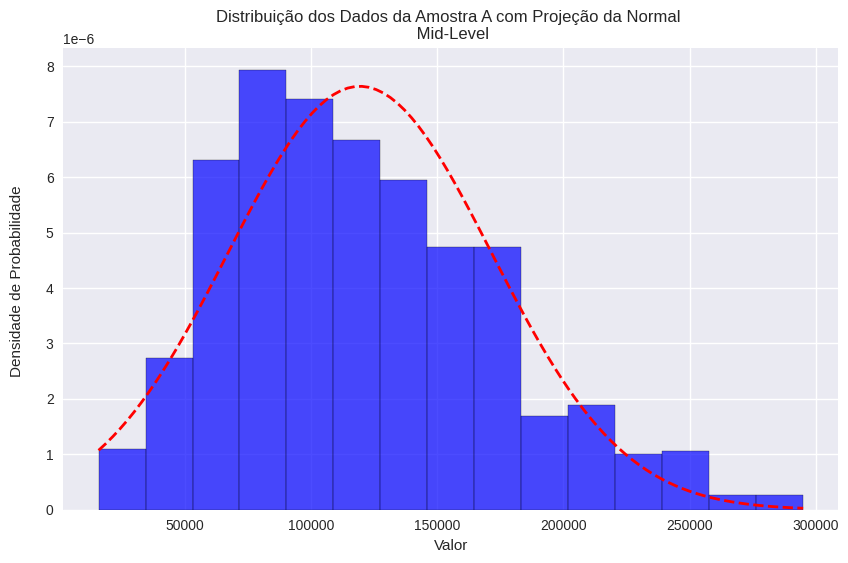



------------------------------------------


Amostra B: estatística=0.9908303022384644, p-valor=9.060851569910044e-13
Amostra B não segue uma distribuição normal (rejeita H0)


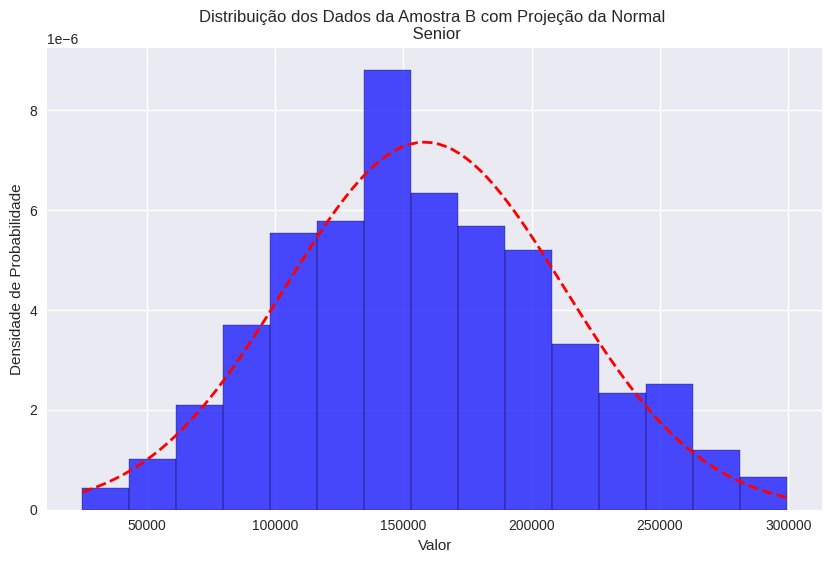

In [ ]:
stat_a, p_a = shapiro(amostra_a)
stat_b, p_b = shapiro(amostra_b)

print(f'Amostra A: estatística={stat_a}, p-valor={p_a}')

# Interpretando os resultados
alpha = 0.05
if p_a > alpha:
    print('Amostra A parece seguir uma distribuição normal (não rejeita H0)')
else:
    print('Amostra A não segue uma distribuição normal (rejeita H0)')

# Criar uma distribuição normal com base na amostra A
mu_a, std_a = np.mean(amostra_a), np.std(amostra_a)
min_val_a = np.min(amostra_a)
max_val_a = np.max(amostra_a)
x_a = np.linspace(min_val_a, max_val_a, 100)
y_a = norm.pdf(x_a, mu_a, std_a)

plt.figure(figsize=(10, 6))
plt.hist(amostra_a, bins=15, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.plot(x_a, y_a, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribuição dos Dados da Amostra A com Projeção da Normal \n Mid-Level')
plt.xlabel('Valor')
plt.ylabel('Densidade de Probabilidade \n')
plt.show()

print("\n")
print("------------------------------------------")
print("\n")

print(f'Amostra B: estatística={stat_b}, p-valor={p_b}')

if p_b > alpha:
    print('Amostra B parece seguir uma distribuição normal (não rejeita H0)')
else:
    print('Amostra B não segue uma distribuição normal (rejeita H0)')

# Criar uma distribuição normal com base na amostra B
mu_b, std_b = np.mean(amostra_b), np.std(amostra_b)
min_val_b = np.min(amostra_b)
max_val_b = np.max(amostra_b)
x_b = np.linspace(min_val_b, max_val_b, 100)
y_b = norm.pdf(x_b, mu_b, std_b)

plt.figure(figsize=(10, 6))
plt.hist(amostra_b, bins=15, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.plot(x_b, y_b, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribuição dos Dados da Amostra B com Projeção da Normal \n Senior')
plt.xlabel('Valor')
plt.ylabel('Densidade de Probabilidade')
plt.show()

In [ ]:
# Teste de Mann-Whitney
stat, p = mannwhitneyu(amostra_a, amostra_b)

print(f'Estatística={stat}, p-valor={p}')

# Interpretando os resultados
if p > alpha:
    print('As distribuições das duas amostras são iguais (não rejeita H0)')
else:
    print('As distribuições das duas amostras são diferentes (rejeita H0)')


Estatística=890507.0, p-valor=2.5007836262926696e-83
As distribuições das duas amostras são diferentes (rejeita H0)


In [ ]:
# Vamos testar a correlação entre 'salary_in_usd' e 'remote_ratio'
stat, p = spearmanr(df['salary_in_usd'], df['remote_ratio'])

print(f'Estatística de correlação={stat}, p-valor={p}')

# Interpretando os resultados
if p > alpha:
    print('As duas amostras são independentes (não rejeita H0)')
else:
    print('Existe uma dependência entre as duas amostras (rejeita H0)')


Estatística de correlação=-0.057063344457471306, p-valor=2.2127891377385586e-11
Existe uma dependência entre as duas amostras (rejeita H0)


# 4a atividade

In [ ]:
# Usando o método sample para separar 70% dos dados para análise
df_analise = df_sample.sample(frac=0.7, random_state=1)
df_validacao = df_sample.drop(df_analise.index)

In [ ]:
# Calculando o tamanho da amostra que é 30% da base de análise
sample_size = int(0.3 * len(df_analise))

# Extraindo as 3 amostras aleatórias
sample1 = df_analise.sample(n=sample_size, random_state=2)
sample2 = df_analise.sample(n=sample_size, random_state=3)
sample3 = df_analise.sample(n=sample_size, random_state=4)

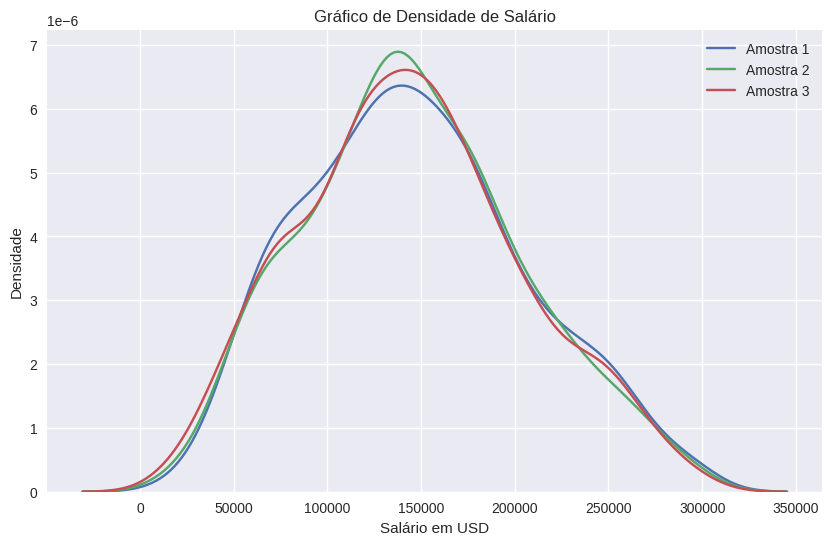

In [ ]:
plt.figure(figsize=(10, 6))
for i, sample in enumerate([sample1, sample2, sample3], start=1):
    sns.kdeplot(sample['salary_in_usd'], label=f'Amostra {i}')
plt.title('Gráfico de Densidade de Salário')
plt.xlabel('Salário em USD')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# falta calcular erros(desvio) OK

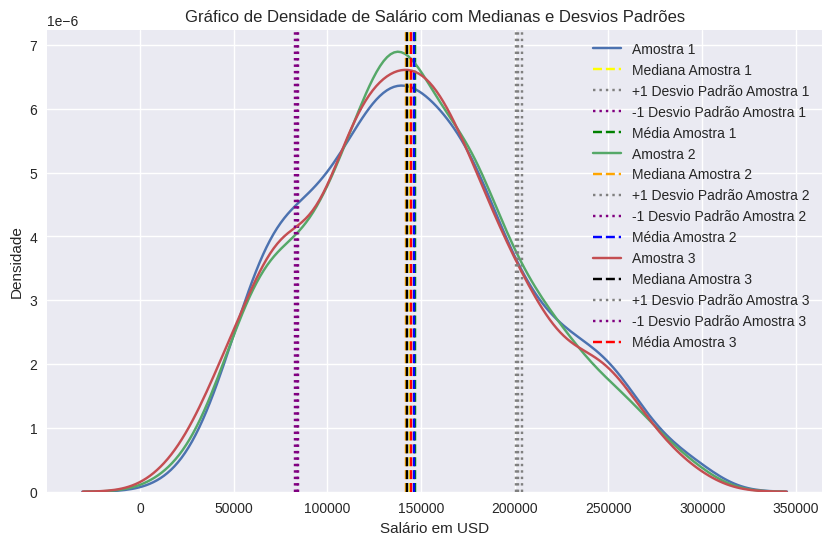

In [ ]:
plt.figure(figsize=(10, 6))
cores = ["pink", "yellow", "orange", "black"]
cores_2 = ["pink", "green", "blue", "red"]
for i, sample in enumerate([sample1, sample2, sample3], start=1):
    median = sample['salary_in_usd'].median()
    std_dev = sample['salary_in_usd'].std()
    Mean = sample['salary_in_usd'].mean()

    # Plotando a distribuição de densidade de cada amostra
    sns.kdeplot(sample['salary_in_usd'], label=f'Amostra {i}')

    # Adicionando linhas verticais para a mediana e desvios padrão
    plt.axvline(median, color=cores[i], linestyle='--', label=f'Mediana Amostra {i}')
    plt.axvline(median + std_dev, color='grey', linestyle=':', label=f'+1 Desvio Padrão Amostra {i}')
    plt.axvline(median - std_dev, color='purple', linestyle=':', label=f'-1 Desvio Padrão Amostra {i}')
    plt.axvline(Mean, color=cores_2[i], linestyle='--', label=f'Média Amostra {i}')

# Adicionando títulos e rótulos
plt.title('Gráfico de Densidade de Salário com Medianas e Desvios Padrões')
plt.xlabel('Salário em USD')
plt.ylabel('Densidade')
plt.legend()
plt.show()



In [ ]:
for i, sample in enumerate([sample1, sample2, sample3], start=1):
    median = sample['salary_in_usd'].median()
    std_dev = sample['salary_in_usd'].std()
    Mean = sample['salary_in_usd'].mean()
    print(f"Amostra {i}:   Mediana = {median:.2f}  ||  Desvio Padrão + 1 = {(median + std_dev):.3f}, Desvio Padrão - 1 =  {(median - std_dev):.3f}  ||  Média = {Mean:.3f}")

Amostra 1:   Mediana = 144000.00  ||  Desvio Padrão + 1 = 203724.845, Desvio Padrão - 1 =  84275.155  ||  Média = 146744.821
Amostra 2:   Mediana = 142200.00  ||  Desvio Padrão + 1 = 200808.791, Desvio Padrão - 1 =  83591.209  ||  Média = 146111.148
Amostra 3:   Mediana = 142276.00  ||  Desvio Padrão + 1 = 201748.886, Desvio Padrão - 1 =  82803.114  ||  Média = 144624.257


<Figure size 1000x600 with 0 Axes>

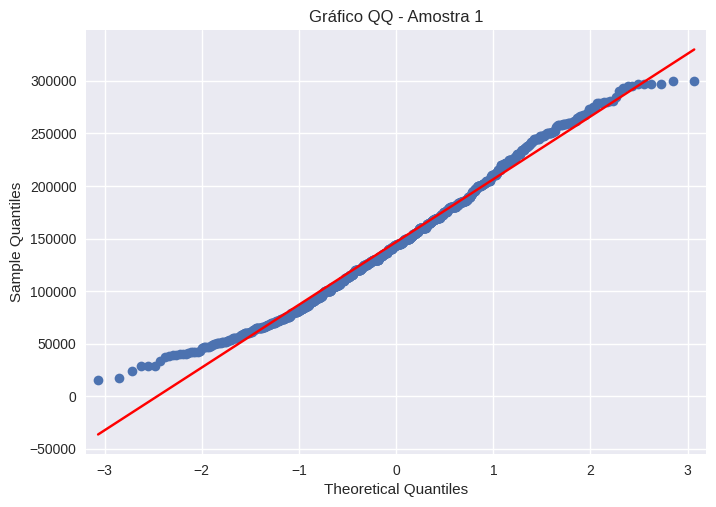

In [ ]:
plt.figure(figsize=(10, 6))
# Gráfico QQ para a primeira amostra
sm.qqplot(sample1['salary_in_usd'], line='s')
plt.title('Gráfico QQ - Amostra 1')
plt.show()

# decisao de projeto? o que fazer com outliers

<Figure size 1000x600 with 0 Axes>

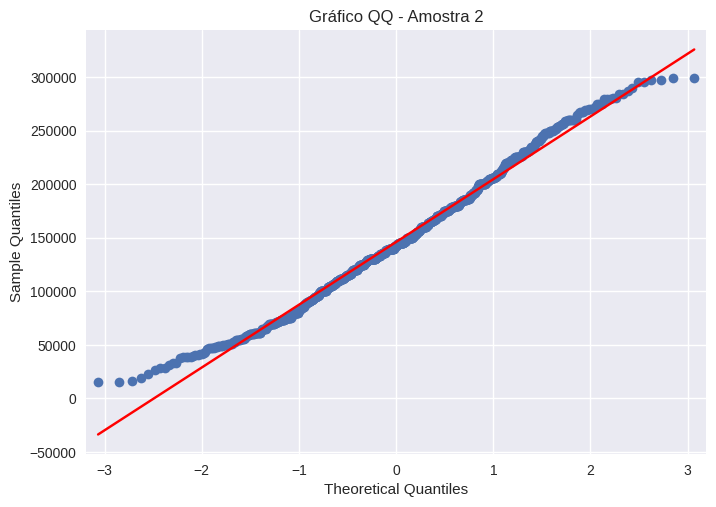

In [ ]:
plt.figure(figsize=(10, 6))
# Gráfico QQ para a primeira amostra
sm.qqplot(sample2['salary_in_usd'], line='s')
plt.title('Gráfico QQ - Amostra 2')
plt.show()

# decisao de projeto? o que fazer com outliers

<Figure size 1000x600 with 0 Axes>

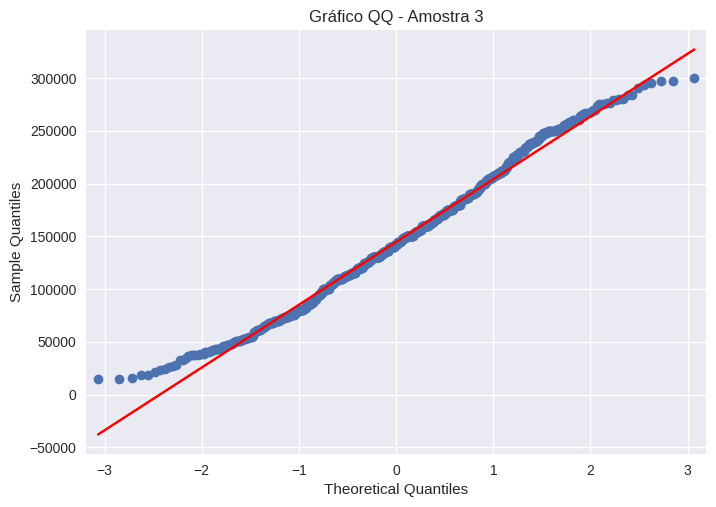

In [ ]:
plt.figure(figsize=(10, 6))
# Gráfico QQ para a primeira amostra
sm.qqplot(sample3['salary_in_usd'], line='s')
plt.title('Gráfico QQ - Amostra 3')
plt.show()

# decisao de projeto? o que fazer com outliers

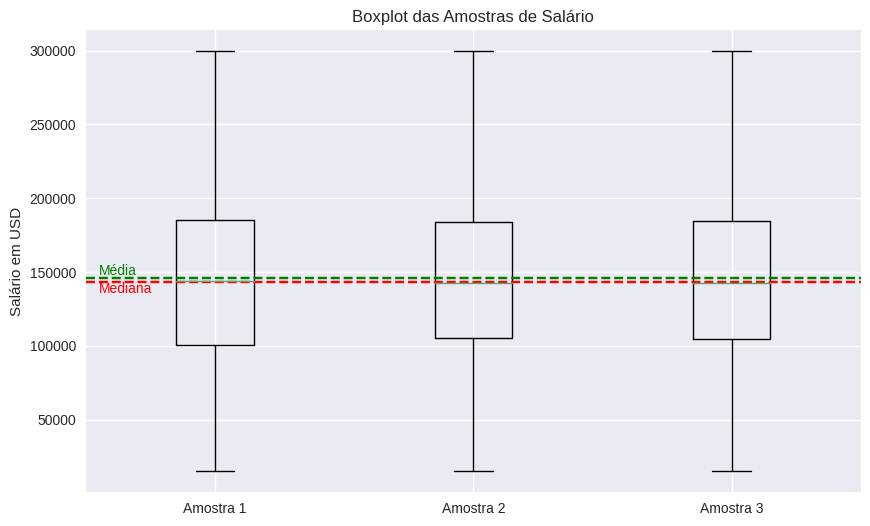

In [ ]:
# Boxplot com as métricas comparando as amostras
plt.figure(figsize=(10, 6))
plt.style.use("seaborn-v0_8")
data_to_plot = [sample['salary_in_usd'] for sample in [sample1, sample2, sample3]]
Median = np.median(data_to_plot)
Mean = np.mean(data_to_plot)
plt.boxplot(data_to_plot, labels=['Amostra 1', 'Amostra 2', 'Amostra 3'])
plt.axhline(Median, color='r', linestyle='--')
plt.text(x=0.55, y=Median, s='Mediana', color='r',va='top')
plt.axhline(Mean, color='green', linestyle='--')
plt.text(x= 0.55, y=Mean, s='Média', color='green', va = 'bottom')
plt.title('Boxplot das Amostras de Salário')
plt.ylabel('Salário em USD')

plt.show()

# colocar linha 150 na mediana   OK